# ***Important libraries and dataset loading***

In [14]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Load the dataset
path = "/content/sales_data_with_discounts.csv"
df= pd.read_csv(path)

# **INITIAL DATA REVIEW**

In [15]:
#view coloms
print(df.columns)

# Rename columns for consistent formatting
df = df.rename(columns={
    'Date': 'Date',
    'Day': 'Day',
    'SKU': 'SKU',
    'city': 'City',
    'Volume': 'Volume',
    'BU': 'BU',
    'Brand': 'Brand',
    'Model': 'Model',
    'Avg Price': 'Avg_Price',
    'Total Sales Value': 'Total_Sales_Value',
    'Discount Rate (%)': 'Discount_Rate',
    'Discount Amount': 'Discount_Amount',
    'Net Sales Value': 'Net_Sales_Value'
})

# Summary statistics
print(df.describe())

#Info about data types and nulls
print(df.info())

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')
           Volume     Avg_Price  Total_Sales_Value  Discount_Rate  \
count  450.000000    450.000000         450.000000     450.000000   
mean     5.066667  10453.433333       33812.835556      15.155242   
std      4.231602  18079.904840       50535.074173       4.220602   
min      1.000000    290.000000         400.000000       5.007822   
25%      3.000000    465.000000        2700.000000      13.965063   
50%      4.000000   1450.000000        5700.000000      16.577766   
75%      6.000000  10100.000000       53200.000000      18.114718   
max     31.000000  60100.000000      196400.000000      19.992407   

       Discount_Amount  Net_Sales_Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min      

# ***Histogram and distribution analysis***

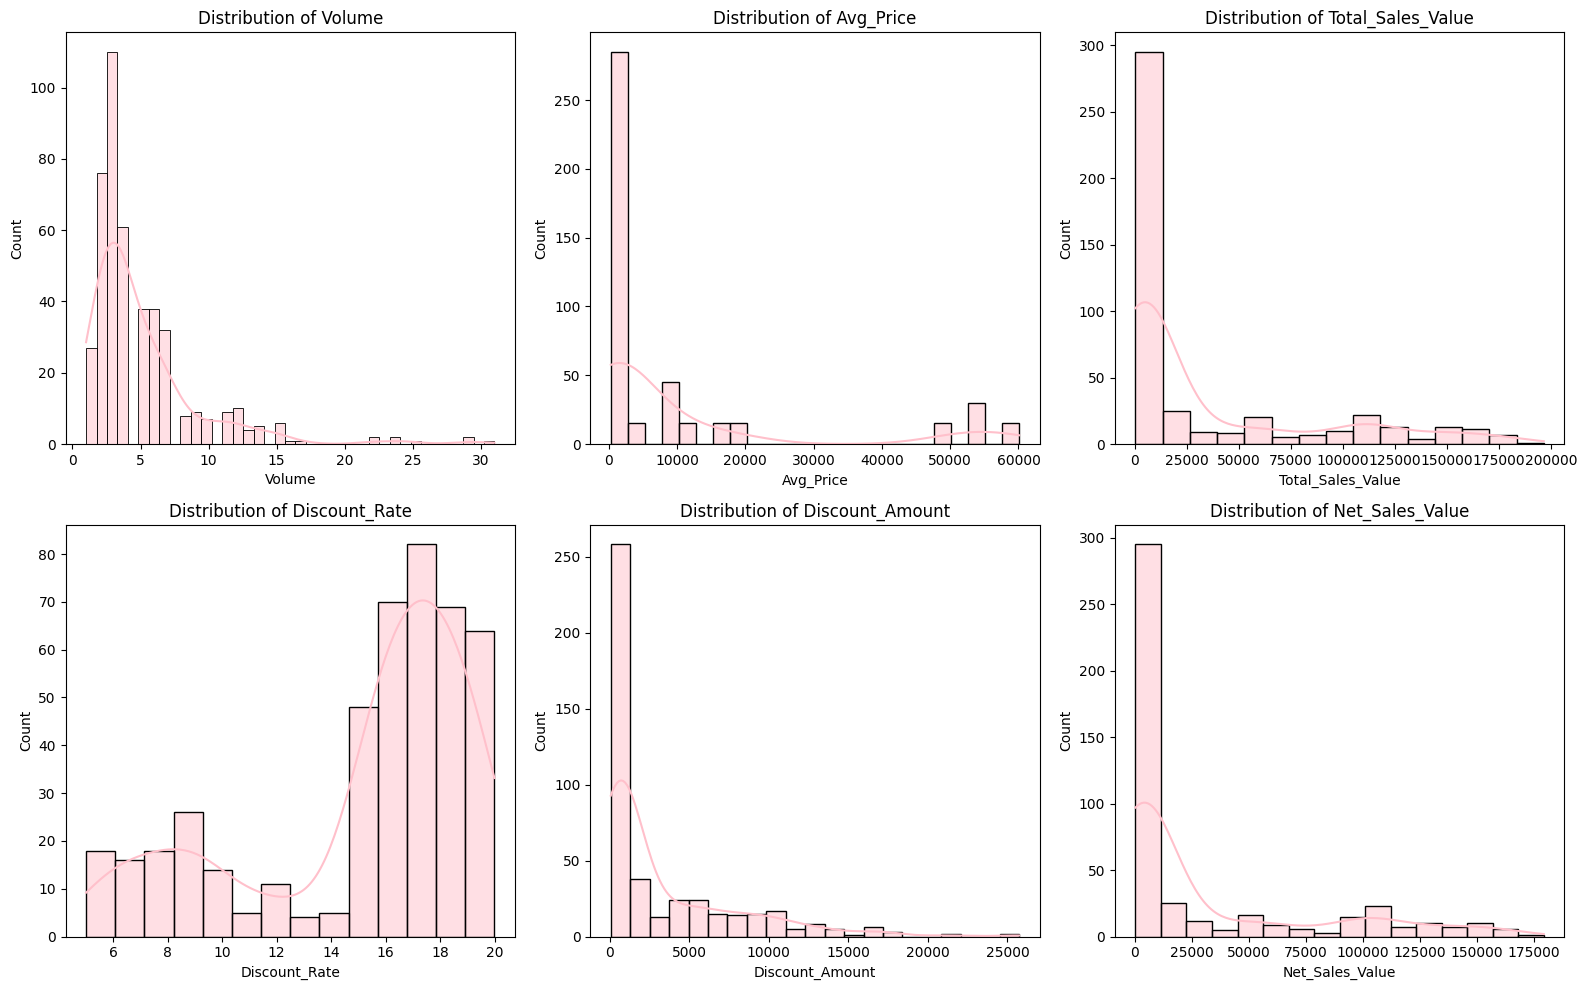

In [9]:
# Plotting histograms for numeric columns
numeric_cols = ['Volume', 'Avg_Price', 'Total_Sales_Value', 'Discount_Rate', 'Discount_Amount', 'Net_Sales_Value']

plt.figure(figsize=(16,10))
for i, col in enumerate(numeric_cols):
  plt.subplot(2, 3, i+1)
  sns.histplot(x=df[col], kde=True, color='pink')
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# ***Boxplot for Outliers detection***

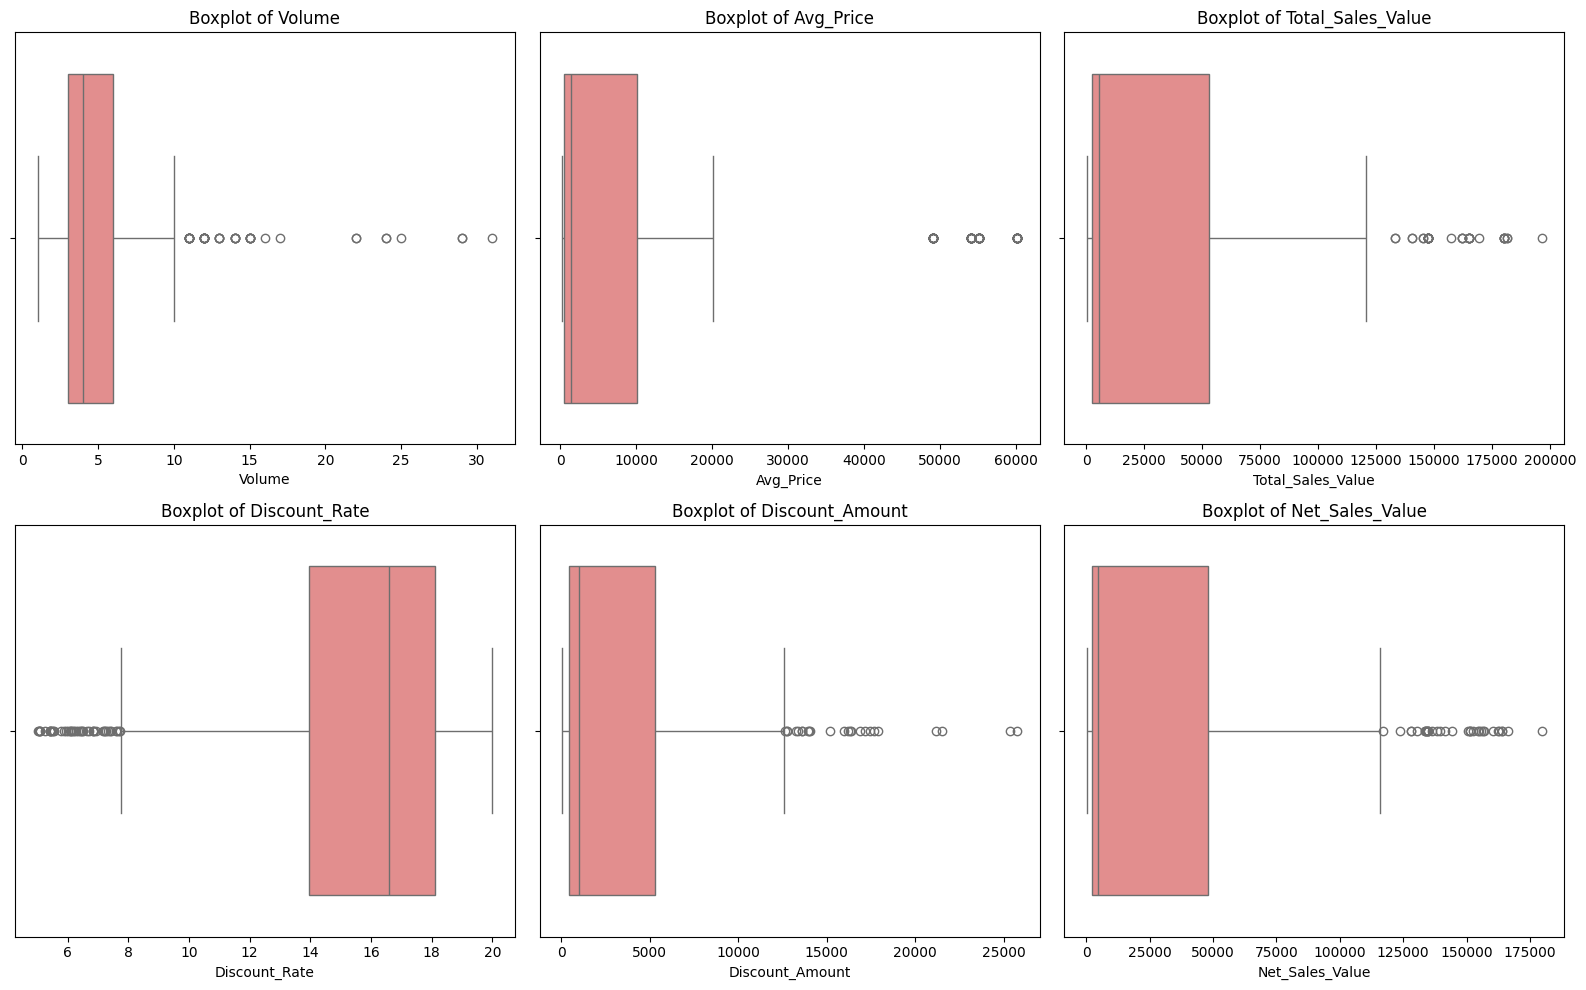

In [10]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# ***Count Plots (Bar Charts for Categories)***

In [17]:
'''categorical_cols = ['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()'''

# Check the original unique values in categorical columns

# List of categorical columns
categorical_cols = ['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

# Print value counts for each categorical column to see if there is variety
for col in categorical_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")



Value counts for Day:
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64

Value counts for SKU:
SKU
M01    15
M02    15
M03    15
M04    15
M05    15
M06    15
M07    15
M08    15
M09    15
M10    15
F01    15
F02    15
F03    15
F04    15
F05    15
F06    15
F07    15
F08    15
F09    15
F10    15
L01    15
L02    15
L03    15
L04    15
L05    15
L06    15
L07    15
L08    15
L09    15
L10    15
Name: count, dtype: int64

Value counts for City:
City
C    450
Name: count, dtype: int64

Value counts for BU:
BU
Mobiles      150
FMCG         150
Lifestyle    150
Name: count, dtype: int64

Value counts for Brand:
Brand
Jeera      90
Viva       60
Gear       60
RealU      45
YouM       45
Babaji     45
Vedic      45
Orange     30
Sumsang    30
Name: count, dtype: int64

Value counts for Model:
Model
RU-10             15
RU-9 Plus         15
YM-99             15
YM-99 Plus        15
YM-98             1

<ipython-input-18-d7f3cdf99fd4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
<ipython-input-18-d7f3cdf99fd4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
<ipython-input-18-d7f3cdf99fd4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
<ipython-input-18-d7f3cdf99fd4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

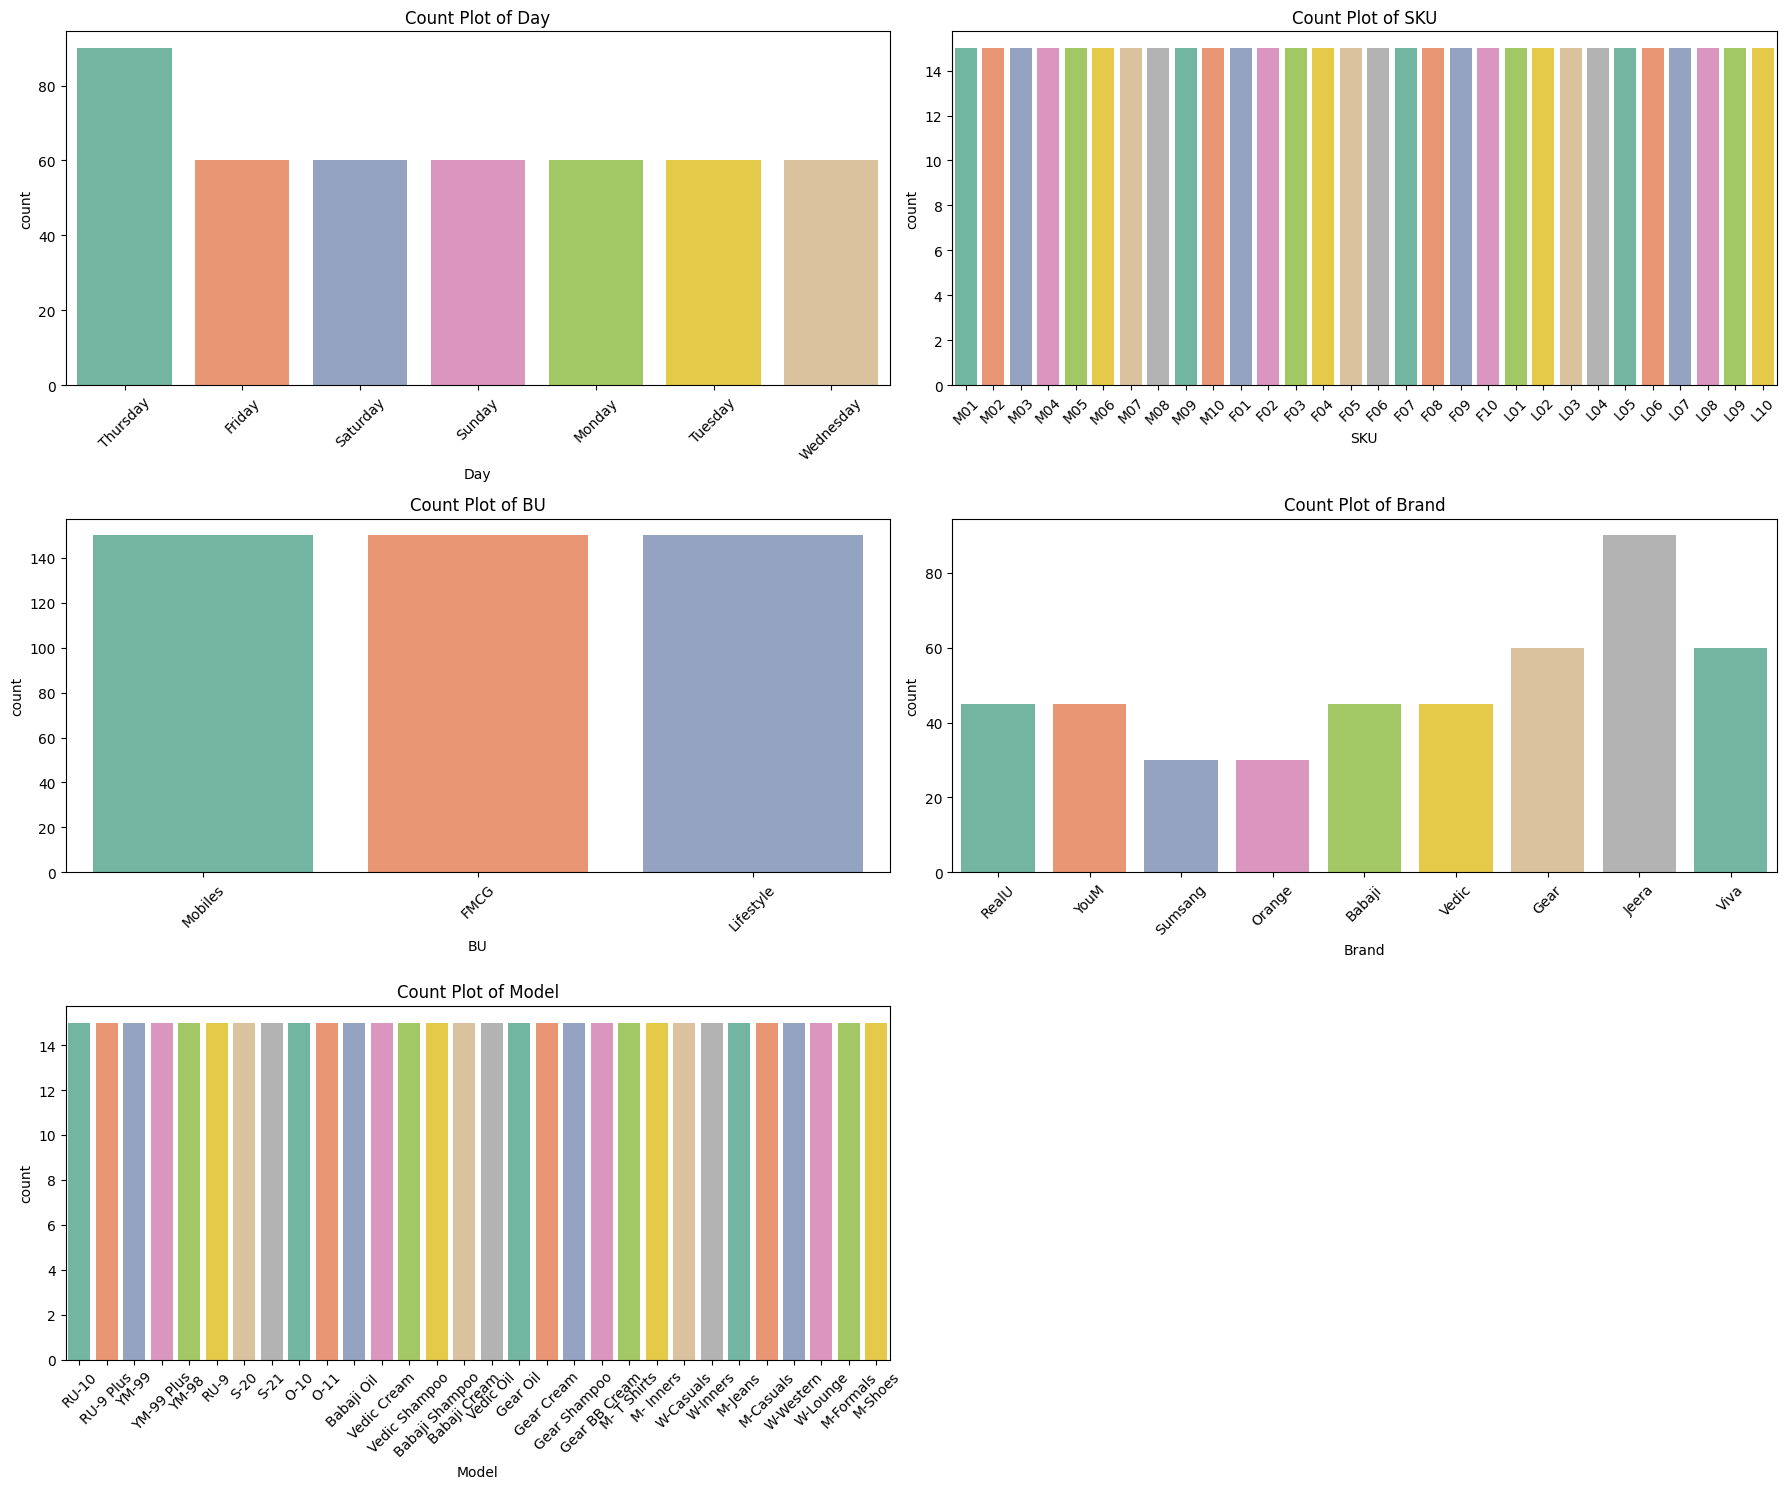

In [18]:
# List of categorical columns to plot (exclude 'City' since it only has 1 unique value)
categorical_cols = ['Day', 'SKU', 'BU', 'Brand', 'Model']

# Set up the figure
plt.figure(figsize=(18, 15))

# Loop through the categorical columns and plot
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)  # Create a 3x2 grid for the plots (3 rows, 2 columns)

    # Plot countplot for each categorical column
    sns.countplot(x=col, data=df, palette='Set2')

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45)

    # Set the title of each subplot
    plt.title(f'Count Plot of {col}')

# Adjust the layout to make sure everything fits properly
plt.tight_layout()

# Display the plots
plt.show()


# **Standardization of numerical Variables**

<ipython-input-12-e65d2511e5ff>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-12-e65d2511e5ff>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


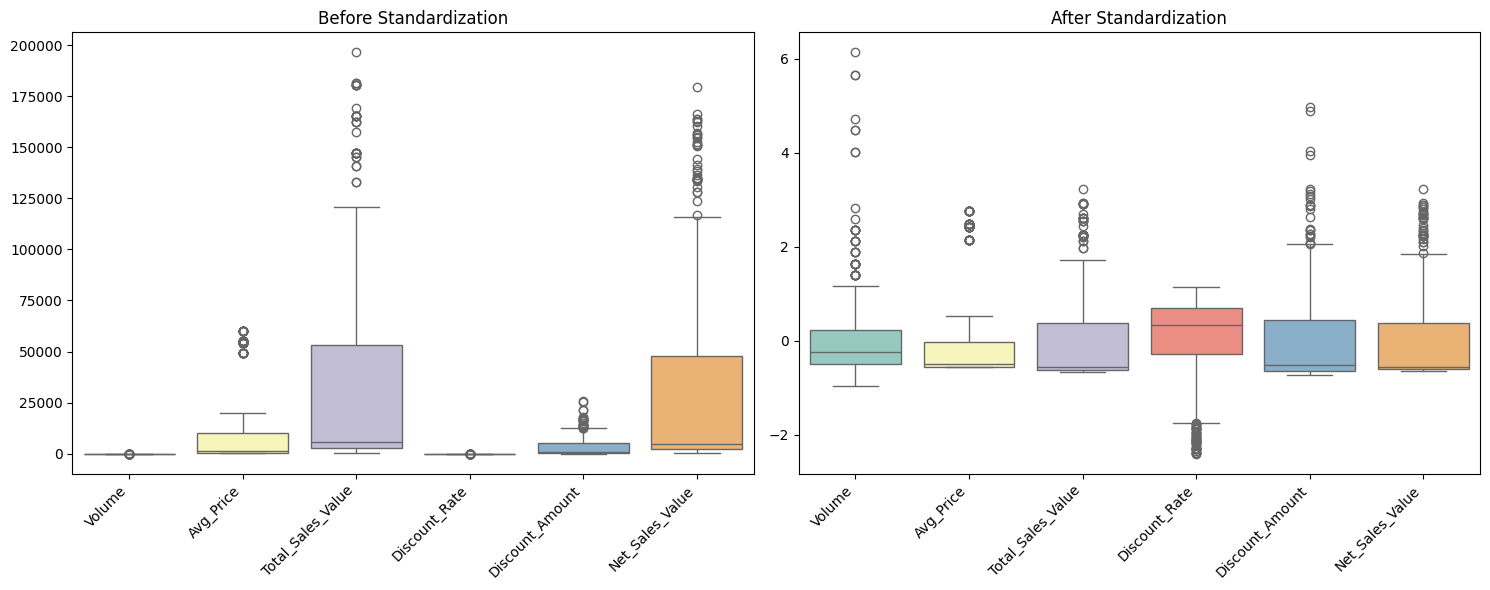

In [12]:
# Create a copy for standardization
df1 = df.copy()

# Select numerical columns
df1_numerical = df1.select_dtypes(include=np.number)

# Standardize using StandardScaler
scaler = StandardScaler()
df1_standardized = scaler.fit_transform(df1_numerical)

# Convert back to DataFrame
df1_standardized = pd.DataFrame(df1_standardized, columns=df1_numerical.columns)

# Visualize Before and After Standardization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=df1_numerical, orient='v', palette='Set3', ax=axes[0])
axes[0].set_title('Before Standardization')

sns.boxplot(data=df1_standardized, orient='v', palette='Set3', ax=axes[1])
axes[1].set_title('After Standardization')

# Rotate x-axis labels
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


# ***Encoding (Dummy Variables)***

In [13]:
# Convert categorical variables into dummy/indicator variables
df2 = df.copy()
df2 = pd.get_dummies(df2, columns=['Day', 'City', 'BU', 'Brand', 'Model'], dtype=int)

# Preview the result
print(df2.head())


         Date  SKU  Volume  Avg_Price  Total_Sales_Value  Discount_Rate  \
0  01-04-2021  M01      15      12100             181500      11.654820   
1  01-04-2021  M02      10      10100             101000      11.560498   
2  01-04-2021  M03       7      16100             112700       9.456886   
3  01-04-2021  M04       6      20100             120600       6.935385   
4  01-04-2021  M05       3       8100              24300      17.995663   

   Discount_Amount  Net_Sales_Value  Day_Friday  Day_Monday  ...  \
0     21153.498820    160346.501180           0           0  ...   
1     11676.102961     89323.897039           0           0  ...   
2     10657.910157    102042.089843           0           0  ...   
3      8364.074702    112235.925298           0           0  ...   
4      4372.946230     19927.053770           0           0  ...   

   Model_Vedic Cream  Model_Vedic Oil  Model_Vedic Shampoo  Model_W-Casuals  \
0                  0                0                    0   